In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
n225 = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/^N225_daily_data_2.csv", index_col=0)
n225 = n225.reset_index(drop=True)
n225.head()

,Date,POSIX,Adj Close,year,month,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close,5_Adj Close,6_Adj Close,7_Adj Close,8_Adj Close,9_Adj Close,10_Adj Close,11_Adj Close,12_Adj Close,13_Adj Close,14_Adj Close
0,1980-01-25,317606400,6767.709961,1980,1,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785,6552.649902,6560.160156
1,1980-01-28,317865600,6763.609863,1980,1,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785,6552.649902
2,1980-01-29,317952000,6770.830078,1980,1,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078,6563.279785
3,1980-01-30,318038400,6776.600098,1980,1,6770.830078,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766,6591.830078
4,1980-01-31,318124800,6768.160156,1980,1,6776.600098,6770.830078,6763.609863,6767.709961,6746.930176,6694.189941,6684.589844,6666.270020,6649.299805,6656.299805,6653.259766,6659.549805,6615.509766,6594.009766


In [39]:
sightseeing = pd.read_csv("/content/drive/MyDrive/comsumer_temperature/datasets/sightseeing.csv", index_col=0)
sightseeing = sightseeing.reset_index(drop=True)
sightseeing.head()

,日付コード,日付,支出,POSIX,year,month
0,2017000101,2017-01-01,3931,1483228800,2017,1
1,2017000202,2017-02-01,3175,1485907200,2017,2
2,2017000303,2017-03-01,5085,1488326400,2017,3
3,2017000404,2017-04-01,3377,1491004800,2017,4
4,2017000505,2017-05-01,3795,1493596800,2017,5


In [40]:
n225 = n225.groupby(["year", "month"])["Adj Close"].mean().reset_index()
n225.head()


,year,month,Adj Close
0,1980,1,6769.382031
1,1980,2,6787.146509
2,1980,3,6600.329032
3,1980,4,6757.300014
4,1980,5,6799.953334


In [41]:
month = 5

for i in range(1, month):
    n225[f"{i}_Adj Close"] = n225["Adj Close"].shift(i)

n225 = n225.dropna(axis=0)
n225.head()

,year,month,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close
4,1980,5,6799.953334,6757.300014,6600.329032,6787.146509,6769.382031
5,1980,6,6818.839565,6799.953334,6757.300014,6600.329032,6787.146509
6,1980,7,6808.699601,6818.839565,6799.953334,6757.300014,6600.329032
7,1980,8,6833.420945,6808.699601,6818.839565,6799.953334,6757.300014
8,1980,9,6983.943481,6833.420945,6808.699601,6818.839565,6799.953334


In [42]:
n225 = n225[n225["year"] >= 2017].reset_index(drop=True)
n225.head()

,year,month,Adj Close,1_Adj Close,2_Adj Close,3_Adj Close,4_Adj Close
0,2017,1,19194.056127,19066.027437,17689.540088,17044.510352,16737.041406
1,2017,2,19188.732910,19194.056127,19066.027437,17689.540088,17044.510352
2,2017,3,19340.177379,19188.732910,19194.056127,19066.027437,17689.540088
3,2017,4,18736.390527,19340.177379,19188.732910,19194.056127,19066.027437
4,2017,5,19726.756445,18736.390527,19340.177379,19188.732910,19194.056127


In [43]:
sightseeing.head()

,日付コード,日付,支出,POSIX,year,month
0,2017000101,2017-01-01,3931,1483228800,2017,1
1,2017000202,2017-02-01,3175,1485907200,2017,2
2,2017000303,2017-03-01,5085,1488326400,2017,3
3,2017000404,2017-04-01,3377,1491004800,2017,4
4,2017000505,2017-05-01,3795,1493596800,2017,5


In [44]:
df = pd.merge(n225, sightseeing, on=["year", "month"])
df = df[["year", "month", "POSIX", "Adj Close", '2_Adj Close',
       '3_Adj Close', "4_Adj Close","支出"]]
df

,year,month,POSIX,Adj Close,2_Adj Close,3_Adj Close,4_Adj Close,支出
0,2017,1,1483228800,19194.056127,17689.540088,17044.510352,16737.041406,3931
1,2017,2,1485907200,19188.732910,19066.027437,17689.540088,17044.510352,3175
2,2017,3,1488326400,19340.177379,19194.056127,19066.027437,17689.540088,5085
3,2017,4,1491004800,18736.390527,19188.732910,19194.056127,19066.027437,3377
4,2017,5,1493596800,19726.756445,19340.177379,19188.732910,19194.056127,3795
...,...,...,...,...,...,...,...,...
75,2023,4,1680307200,28275.821484,27509.115029,26606.281456,27214.691673,6685
76,2023,5,1682899200,30147.526074,27693.202060,27509.115029,26606.281456,7061
77,2023,6,1685577600,32754.475231,28275.821484,27693.202060,27509.115029,7168
78,2023,7,1688169600,32694.144824,30147.526074,28275.821484,27693.202060,9309


In [45]:
X = df.drop(["支出", "year", "month"], axis=1).values
y = df["支出"].values

In [46]:
N = len(df["POSIX"])
N_train = round(N * .85)

In [47]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
feature_importances = rf.feature_importances_

In [50]:
importances = pd.DataFrame(feature_importances,
                        index=df.drop(["支出", "month", "year"], axis=1).columns)

In [51]:
importances.sort_values(by=0, ascending=False)

,0
POSIX,0.651019
Adj Close,0.106676
4_Adj Close,0.097866
2_Adj Close,0.083817
3_Adj Close,0.060622


In [52]:
y_pred = rf.predict(X_test)

(1450000000.0, 1700000000.0)

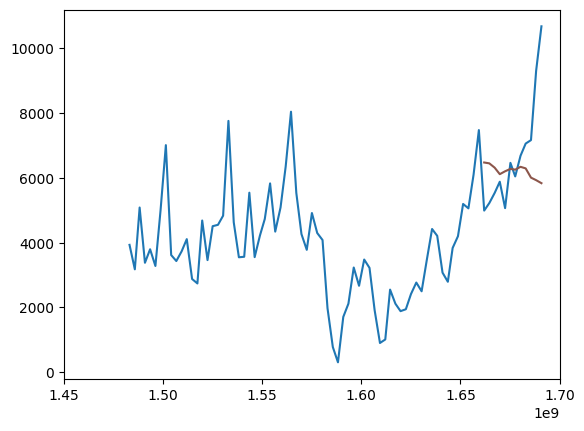

In [55]:
plt.plot(X, y)
plt.plot(X_test, y_pred)
plt.xlim([1.45e9, 1.7e9])

In [54]:
rf.score(X_test, y_test)

-0.2823944201318569